# Reporte 7
- Luis Jiménez
- Lenin Quezada 
- José Melchor

# Técnicas de Optimización en el Contexto Empresarial

## Objetivo de la Sesión

En esta sesión, aprenderemos sobre **técnicas de optimización** y cómo aplicarlas para mejorar la toma de decisiones en un contexto empresarial. Nos enfocaremos en cómo maximizar el retorno sobre la inversión en marketing al optimizar la asignación de capital en diferentes canales de adquisición de clientes. Este tipo de optimización es esencial cuando el **Costo de Adquisición de Clientes (CAC)** no sigue una relación lineal y varía según el canal y el volumen de clientes deseado.

---

### Introducción a la Optimización

**La optimización** es el proceso de encontrar el mejor resultado posible bajo un conjunto de restricciones. En el contexto empresarial, esto implica maximizar o minimizar un indicador clave de rendimiento (KPI) o un valor objetivo, como ingresos, CAC o retorno sobre inversión (ROI). La optimización es una herramienta poderosa en el análisis prescriptivo, ya que permite a las empresas decidir cómo asignar sus recursos de manera eficiente.

---

### Importancia de la Optimización en la Asignación de Presupuesto de Marketing

En empresas donde los **canales de adquisición** varían en costo y efectividad, es fundamental determinar la asignación óptima del presupuesto de marketing. Los costos de adquisición tienden a **incrementarse a medida que aumenta el número de usuarios** que se desea adquirir, ya que la competencia se intensifica y se agotan los segmentos de menor costo.

**Objetivos Clave:**
1. **Minimizar el CAC**: Lograr el menor costo posible por cada usuario adquirido.
2. **Maximizar el ARPU (Average Revenue per User)**: Aumentar los ingresos promedio por usuario.
3. **Optimizar la Asignación de Capital**: Asignar el presupuesto a los canales con el mejor rendimiento en términos de CAC y ARPU, sujeto a restricciones.

---

## Método del Caso: Optimización de Presupuesto de Marketing en una Empresa de Software

### Contexto del Caso

La empresa **TechGrowth**, dedicada a vender suscripciones de software de productividad, quiere aumentar su base de usuarios mientras mantiene un CAC razonable. Sin embargo, el costo de adquirir nuevos usuarios depende del canal y de la cantidad de usuarios que la empresa intenta captar en cada canal. Por ejemplo, adquirir los primeros usuarios a través de Google Ads puede ser más barato, pero a medida que aumentan los usuarios captados, el costo por usuario también sube debido a la competencia.

**Canales de Adquisición de Clientes**:
1. **Google Ads**: Costoso pero con gran alcance.
2. **Facebook Ads**: Moderado en costo, útil para segmentación detallada.
3. **Marketing de Contenidos**: Coste inicial bajo, pero requiere tiempo para ver resultados.
4. **Publicidad en LinkedIn**: Específico para clientes en el sector empresarial, con un CAC alto, pero mayor conversión.

### Objetivo del Caso

Optimizar el presupuesto de marketing para maximizar el número de usuarios adquiridos sin sobrepasar el límite del presupuesto asignado. Se busca equilibrar los **costos** y los **resultados** de cada canal para obtener el mejor rendimiento en términos de CAC y usuarios adquiridos.

### Restricciones del Caso
- **Presupuesto límite**: La empresa dispone de un presupuesto total fijo para asignar entre los canales.
- **Costo incremental**: Cada canal tiene un **CAC creciente** a medida que se adquieren más usuarios.
- **Objetivo mínimo de usuarios**: La empresa desea captar un número mínimo de usuarios para justificar el gasto de marketing.

---

## Ejercicio Práctico: Optimización de la Asignación de Presupuesto

A continuación, utilizaremos Python y técnicas de optimización para resolver el caso. Vamos a definir y resolver un modelo de optimización en el que asignaremos el presupuesto entre los canales de adquisición con base en el CAC y el número de usuarios objetivo.

**Supuestos del Ejercicio**:
- Cada canal tiene una función de CAC que depende del número de usuarios adquiridos en ese canal.
- El CAC aumenta a medida que se captan más usuarios en un canal específico.

---

### Paso 1: Definir las Funciones de CAC para Cada Canal

Cada canal tendrá una función de costo incremental basada en el número de usuarios que se desean adquirir. Esto simula el aumento en el CAC conforme aumentan los usuarios captados.

In [1]:
import numpy as np

# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

### Paso 2: Definir el Problema de Optimización
Utilizaremos Programación No Lineal para maximizar el número de usuarios sujeto a restricciones de presupuesto.

In [2]:
from scipy.optimize import minimize

# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 103
Facebook Ads: 205
Marketing de Contenidos: 383
LinkedIn: 38
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 729


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(list(range(1,1000,1)))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       999 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


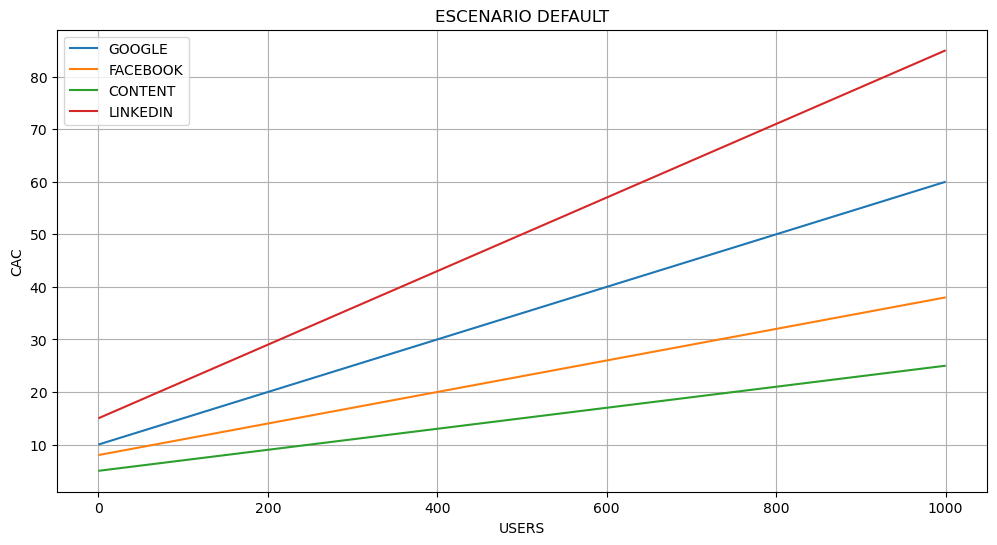

In [4]:
df['cac_google'] = df[0].apply(lambda x: cac_google_ads(x))
df['cac_facebook'] = df[0].apply(lambda x: cac_facebook_ads(x))
df['cac_content'] = df[0].apply(lambda x: cac_content_marketing(x))
df['cac_linkedin'] = df[0].apply(lambda x: cac_linkedin(x))
plt.figure(figsize=(12,6))
plt.plot(df[0], df['cac_google'], label='GOOGLE')
plt.plot(df[0], df['cac_facebook'],  label='FACEBOOK')
plt.plot(df[0], df['cac_content'],  label='CONTENT')
plt.plot(df[0], df['cac_linkedin'], label='LINKEDIN')
plt.title('ESCENARIO DEFAULT')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

### Paso 3: Interpretación y Análisis de Resultados
- ¿Cuál es la mejor asignación de presupuesto para cada canal?
- ¿Qué canales generan un CAC más bajo en función del objetivo de usuarios?
- ¿Cómo impacta la restricción de presupuesto en la asignación óptima de usuarios?


### Reflexión Final
1. Ventajas de la Optimización en el Marketing: Identificar cómo la optimización ayuda a maximizar la adquisición de clientes manteniendo los costos controlados.
2. Impacto en la Estrategia de Negocios: Reflexionar sobre cómo la asignación óptima de presupuesto puede influir en el crecimiento de la empresa.
3. Consideraciones Futuras: Discutir qué otros factores, como la tasa de conversión o el ARPU, podrían incluirse en futuros análisis de optimización.


### Reporte de laboratorio
- Discusión en Clase: Discutir los resultados obtenidos y comparar con estrategias de marketing en casos reales.
- Trabajo en Equipo:
    - Análisis de CAC Incremental: Simula cómo cambian los resultados al ajustar los coeficientes de incremento de CAC en cada canal.
    - Simulación de Escenarios: Experimenta con diferentes límites de presupuesto y objetivos de usuarios, observando cómo cambian los resultados de la optimización.
    - Visualización de Resultados: Utiliza gráficos para visualizar el costo incremental por usuario y comparar el rendimiento de cada canal.
    - Cuanto debo de gastar en cada canal.

In [5]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

## Escenario 1: Mayor pendiente en Facebook, Content y mayor presupuesto

### Visualuización de Resultados

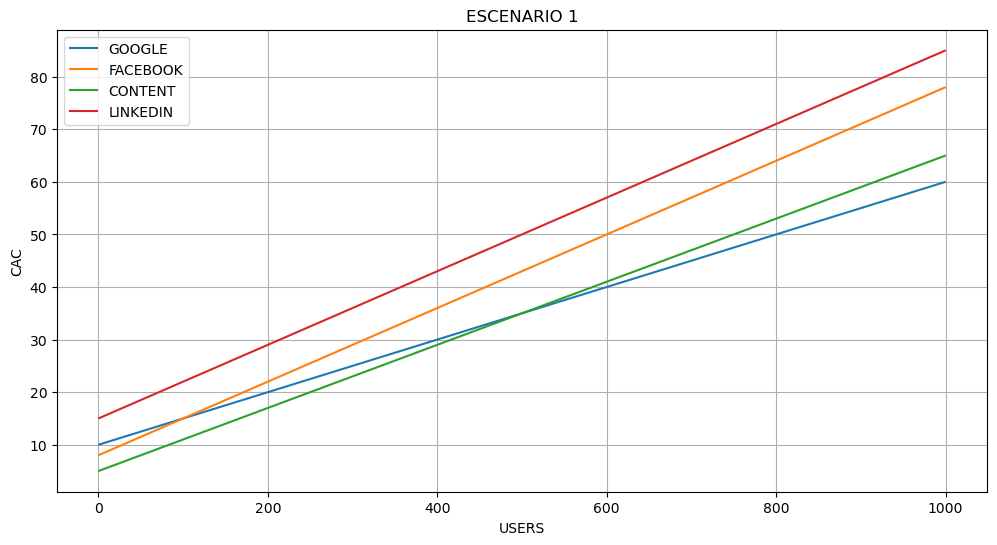

In [6]:
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.07 * users

def cac_content_marketing(users):
    return 5 + 0.06 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

# Presupuesto total en USD
budget = 15000

result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

df2 = pd.DataFrame(list(range(1,1000,1)))
df2['cac_google'] = df2[0].apply(lambda x: cac_google_ads(x))
df2['cac_facebook'] = df2[0].apply(lambda x: cac_facebook_ads(x))
df2['cac_content'] = df2[0].apply(lambda x: cac_content_marketing(x))
df2['cac_linkedin'] = df2[0].apply(lambda x: cac_linkedin(x))
plt.figure(figsize=(12,6))
plt.plot(df2[0], df2['cac_google'], label='GOOGLE')
plt.plot(df2[0], df2['cac_facebook'],  label='FACEBOOK')
plt.plot(df2[0], df2['cac_content'],  label='CONTENT')
plt.plot(df2[0], df2['cac_linkedin'], label='LINKEDIN')
plt.title('ESCENARIO 1')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

### Usuarios adquiridos y costo por canal

In [7]:
# Número de usuarios adquiridos por canal
optimal_users = result.x
google_users, fb_users, content_users, linkedin_users = optimal_users

# Costo por canal reemplazando en las funciones de CAC
spend_google = google_users * cac_google_ads(google_users)
spend_fb = fb_users * cac_facebook_ads(fb_users)
spend_content = content_users * cac_content_marketing(content_users)
spend_linkedin = linkedin_users * cac_linkedin(linkedin_users)

print("Usuarios y costos óptimos por canal:")
print(f"Google Ads:               Se adquieren {int(result.x[0])} usuarios gastando ${spend_google:.2f}.")
print(f"FaceBook Ads:             Se adquieren {int(result.x[1])} usuarios gastando ${spend_fb:.2f}.")
print(f"Marketing de Contenidos:  Se adquieren {int(result.x[2])} usuarios gastando ${spend_content:.2f}.")
print(f"LinkedIn:                 Se adquieren {int(result.x[3])} usuarios gastando ${spend_linkedin:.2f}.")
print(f"\nCosto total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios y costos óptimos por canal:
Google Ads:               Se adquieren 219 usuarios gastando $4600.17.
FaceBook Ads:             Se adquieren 170 usuarios gastando $3414.43.
Marketing de Contenidos:  Se adquieren 224 usuarios gastando $4145.97.
LinkedIn:                 Se adquieren 120 usuarios gastando $2839.44.

Costo total estimado: $15,000.00
Usuarios totales adquiridos: 735


## Escenario 2: Hay funciones exponenciales.

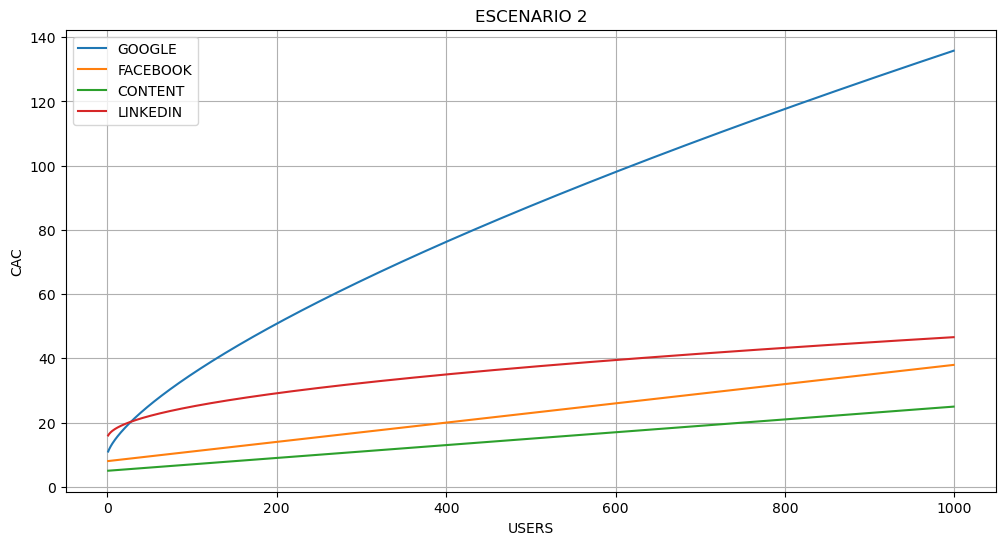

In [8]:
def cac_google_ads(users):
    return 10 +users**(0.7)  

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + users**0.5

budget = 10000

result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

df2 = pd.DataFrame(list(range(1,1000,1)))
df2['cac_google'] = df2[0].apply(lambda x: cac_google_ads(x))
df2['cac_facebook'] = df2[0].apply(lambda x: cac_facebook_ads(x))
df2['cac_content'] = df2[0].apply(lambda x: cac_content_marketing(x))
df2['cac_linkedin'] = df2[0].apply(lambda x: cac_linkedin(x))
plt.figure(figsize=(12,6))
plt.plot(df2[0], df2['cac_google'], label='GOOGLE')
plt.plot(df2[0], df2['cac_facebook'],  label='FACEBOOK')
plt.plot(df2[0], df2['cac_content'],  label='CONTENT')
plt.plot(df2[0], df2['cac_linkedin'], label='LINKEDIN')
plt.title('ESCENARIO 2')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

In [9]:
# Número de usuarios adquiridos por canal
optimal_users = result.x
google_users, fb_users, content_users, linkedin_users = optimal_users

# Costo por canal reemplazando en las funciones de CAC
spend_google = google_users * cac_google_ads(google_users)
spend_fb = fb_users * cac_facebook_ads(fb_users)
spend_content = content_users * cac_content_marketing(content_users)
spend_linkedin = linkedin_users * cac_linkedin(linkedin_users)


print("Usuarios y costos óptimos por canal:")
print(f"Google Ads:               Se adquieren {int(result.x[0])} usuarios gastando ${spend_google:.2f}.")
print(f"FaceBook Ads:             Se adquieren {int(result.x[1])} usuarios gastando ${spend_fb:.2f}.")
print(f"Marketing de Contenidos:  Se adquieren {int(result.x[2])} usuarios gastando ${spend_content:.2f}.")
print(f"LinkedIn:                 Se adquieren {int(result.x[3])} usuarios gastando ${spend_linkedin:.2f}.")
print(f"\nCosto total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios y costos óptimos por canal:
Google Ads:               Se adquieren 16 usuarios gastando $280.42.
FaceBook Ads:             Se adquieren 234 usuarios gastando $3518.72.
Marketing de Contenidos:  Se adquieren 426 usuarios gastando $5765.56.
LinkedIn:                 Se adquieren 22 usuarios gastando $435.30.

Costo total estimado: $10,000.00
Usuarios totales adquiridos: 698


## Escenario 3  Exponencial con diferentes presupuestos

In [10]:
def cac_google_ads(users):
    return 10 * np.exp(0.0001 * users)

def cac_facebook_ads(users):
    return 8 * np.exp(0.0008 * users)

def cac_content_marketing(users):
    return 5 * np.exp(0.0005 * users)

def cac_linkedin(users):
    return 15 * np.exp(0.00015 * users)

def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)

def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Presupuestos
budgets = [5000, 10000, 15000, 20000]
bounds = [(0, None), (0, None), (0, None), (0, None)]
initial_guess = [0, 0, 0, 0]
results = []

# Ejecutar optimización para cada presupuesto
for budget in budgets:
    constraints = [{'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}]
    result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)
    results.append({
        'Presupuesto': budget,
        'Google Ads': int(result.x[0]),
        'Facebook Ads': int(result.x[1]),
        'Content Marketing': int(result.x[2]),
        'LinkedIn': int(result.x[3]),
        'Costo Total': total_cost(result.x),
        'Usuarios Totales': -result.fun
    })

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Función para imprimir los resultados en el formato deseado
def format_results(row):
    print(f"Presupuesto: ${row['Presupuesto']:,.2f}")
    print(f"Google Ads:               Se adquieren {row['Google Ads']} usuarios gastando ${row['Google Ads'] * cac_google_ads(row['Google Ads']):,.2f}.")
    print(f"Facebook Ads:             Se adquieren {row['Facebook Ads']} usuarios gastando ${row['Facebook Ads'] * cac_facebook_ads(row['Facebook Ads']):,.2f}.")
    print(f"Marketing de Contenidos:  Se adquieren {row['Content Marketing']} usuarios gastando ${row['Content Marketing'] * cac_content_marketing(row['Content Marketing']):,.2f}.")
    print(f"LinkedIn:                 Se adquieren {row['LinkedIn']} usuarios gastando ${row['LinkedIn'] * cac_linkedin(row['LinkedIn']):,.2f}.\n")
    print(f"Costo total estimado: ${row['Costo Total']:,.2f}")
    print(f"Usuarios totales adquiridos: {int(row['Usuarios Totales'])}\n")

# Imprimir cada presupuesto en el formato deseado
for i, row in df_results.iterrows():
    format_results(row)


Presupuesto: $5,000.00
Google Ads:               Se adquieren 0.0 usuarios gastando $0.00.
Facebook Ads:             Se adquieren 77.0 usuarios gastando $655.14.
Marketing de Contenidos:  Se adquieren 633.0 usuarios gastando $4,343.38.
LinkedIn:                 Se adquieren 0.0 usuarios gastando $0.00.

Costo total estimado: $5,000.00
Usuarios totales adquiridos: 710

Presupuesto: $10,000.00
Google Ads:               Se adquieren 233.0 usuarios gastando $2,384.93.
Facebook Ads:             Se adquieren 174.0 usuarios gastando $1,599.90.
Marketing de Contenidos:  Se adquieren 803.0 usuarios gastando $5,998.67.
LinkedIn:                 Se adquieren 0.0 usuarios gastando $0.00.

Costo total estimado: $10,000.00
Usuarios totales adquiridos: 1211

Presupuesto: $15,000.00
Google Ads:               Se adquieren 572.0 usuarios gastando $6,056.72.
Facebook Ads:             Se adquieren 218.0 usuarios gastando $2,076.29.
Marketing de Contenidos:  Se adquieren 881.0 usuarios gastando $6,843.10.


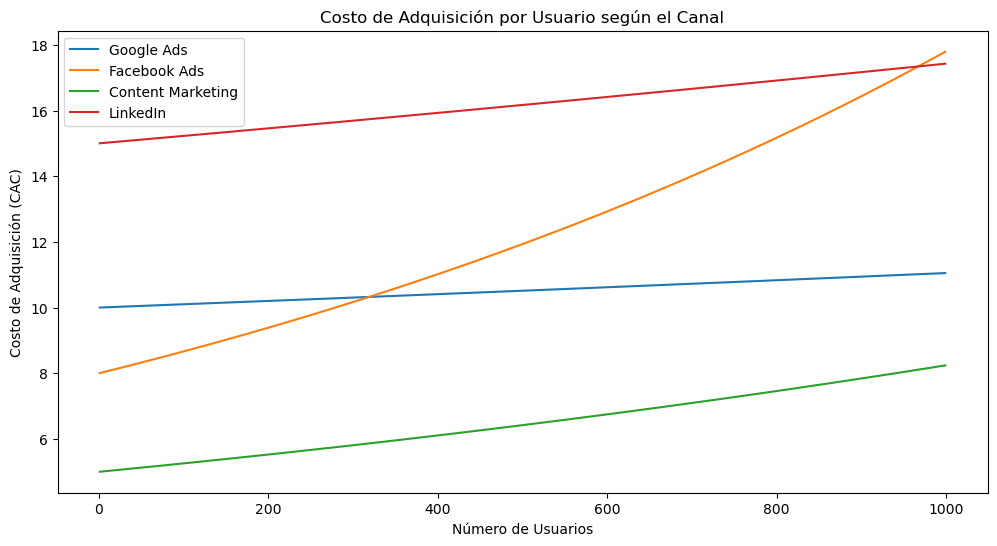

In [11]:
# Gráficas de CAC para cada canal
user_range = np.arange(1, 1000, 1)
cac_google = [cac_google_ads(u) for u in user_range]
cac_facebook = [cac_facebook_ads(u) for u in user_range]
cac_content = [cac_content_marketing(u) for u in user_range]
cac_linkedin = [cac_linkedin(u) for u in user_range]

plt.figure(figsize=(12, 6))
plt.plot(user_range, cac_google, label='Google Ads')
plt.plot(user_range, cac_facebook, label='Facebook Ads')
plt.plot(user_range, cac_content, label='Content Marketing')
plt.plot(user_range, cac_linkedin, label='LinkedIn')
plt.xlabel('Número de Usuarios')
plt.ylabel('Costo de Adquisición (CAC)')
plt.title('Costo de Adquisición por Usuario según el Canal')
plt.legend()
plt.show()

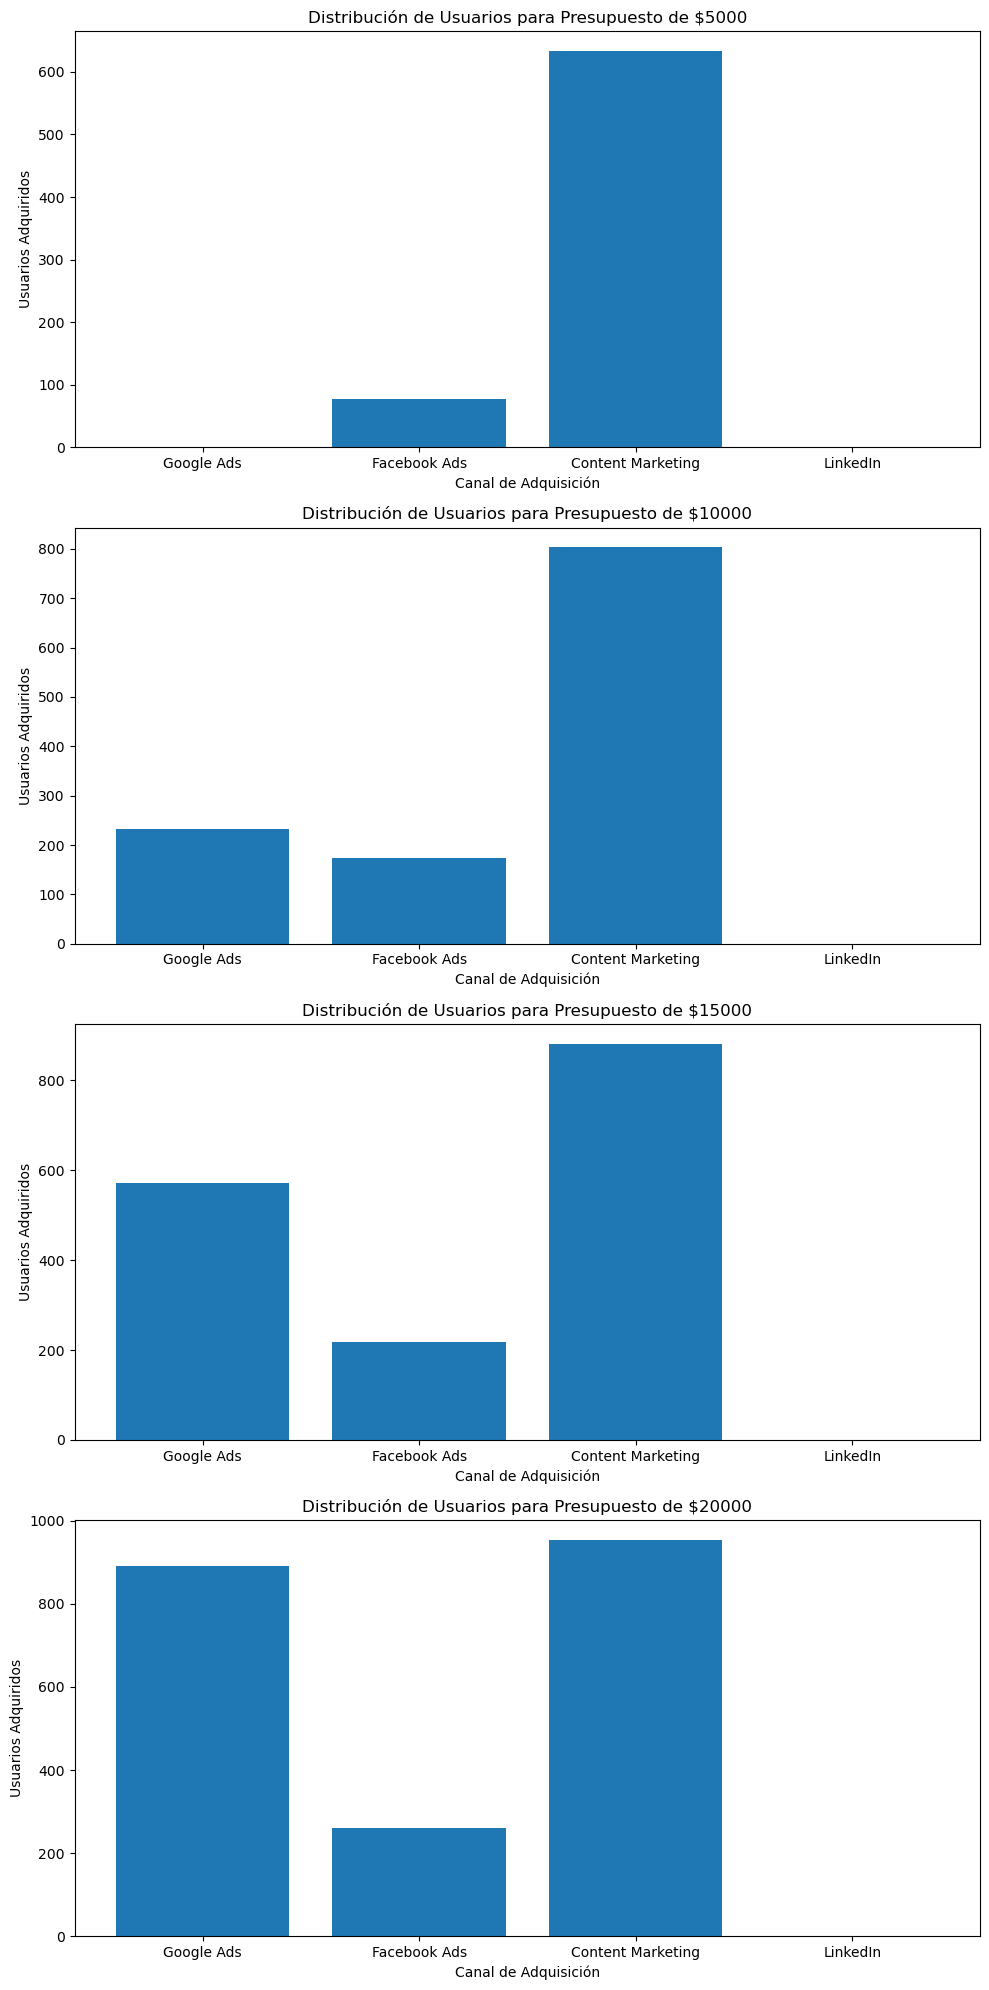

In [12]:
# Paso 4: Gráfica de distribución de usuarios adquiridos en cada canal según el presupuesto
fig, ax = plt.subplots(len(budgets), 1, figsize=(10, 20))

for i, budget in enumerate(budgets):
    ax[i].bar(['Google Ads', 'Facebook Ads', 'Content Marketing', 'LinkedIn'],
              [results[i]['Google Ads'], results[i]['Facebook Ads'],
               results[i]['Content Marketing'], results[i]['LinkedIn']])
    ax[i].set_title(f'Distribución de Usuarios para Presupuesto de ${budget}')
    ax[i].set_ylabel('Usuarios Adquiridos')
    ax[i].set_xlabel('Canal de Adquisición')

plt.tight_layout()
plt.show()

## Escenario 4: Lineal Mayor pendiente LinkedIn y mismo presupuesto $10000

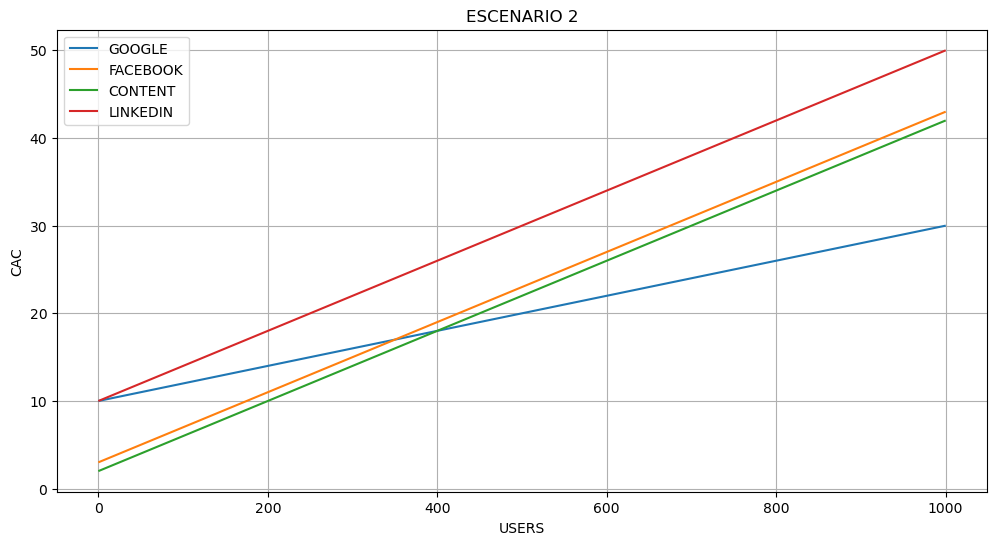

In [13]:
def cac_google_ads(users):
    return 10 + 0.02 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 3 + 0.04 * users

def cac_content_marketing(users):
    return 2 + 0.04 * users

def cac_linkedin(users):
    return 10 + 0.04 * users

budget = 10000

result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

df2 = pd.DataFrame(list(range(1,1000,1)))
df2['cac_google'] = df2[0].apply(lambda x: cac_google_ads(x))
df2['cac_facebook'] = df2[0].apply(lambda x: cac_facebook_ads(x))
df2['cac_content'] = df2[0].apply(lambda x: cac_content_marketing(x))
df2['cac_linkedin'] = df2[0].apply(lambda x: cac_linkedin(x))
plt.figure(figsize=(12,6))
plt.plot(df2[0], df2['cac_google'], label='GOOGLE')
plt.plot(df2[0], df2['cac_facebook'],  label='FACEBOOK')
plt.plot(df2[0], df2['cac_content'],  label='CONTENT')
plt.plot(df2[0], df2['cac_linkedin'], label='LINKEDIN')
plt.title('ESCENARIO 2')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

In [14]:
optimal_users = result.x
google_users, fb_users, content_users, linkedin_users = optimal_users

# Costo por canal reemplazando en las funciones de CAC
spend_google = google_users * cac_google_ads(google_users)
spend_fb = fb_users * cac_facebook_ads(fb_users)
spend_content = content_users * cac_content_marketing(content_users)
spend_linkedin = linkedin_users * cac_linkedin(linkedin_users)


print("Usuarios y costos óptimos por canal:")
print(f"Google Ads:               Se adquieren {int(result.x[0])} usuarios gastando ${spend_google:.2f}.")
print(f"FaceBook Ads:             Se adquieren {int(result.x[1])} usuarios gastando ${spend_fb:.2f}.")
print(f"Marketing de Contenidos:  Se adquieren {int(result.x[2])} usuarios gastando ${spend_content:.2f}.")
print(f"LinkedIn:                 Se adquieren {int(result.x[3])} usuarios gastando ${spend_linkedin:.2f}.")
print(f"\nCosto total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios y costos óptimos por canal:
Google Ads:               Se adquieren 239 usuarios gastando $3532.48.
FaceBook Ads:             Se adquieren 207 usuarios gastando $2335.00.
Marketing de Contenidos:  Se adquieren 219 usuarios gastando $2366.26.
LinkedIn:                 Se adquieren 119 usuarios gastando $1766.26.

Costo total estimado: $10,000.00
Usuarios totales adquiridos: 785
